# <a> e. Choosing the Algorithm for the Project
</a>


* To choose an appropriate algorithm for the project, several factors need to be considered. These factors include the nature of the problem, available data, desired output, and performance requirements. Since the problem involves forecasting sales for a retail store, a time series forecasting algorithm would be suitable.

* Possible algorithms for time series forecasting include:

1) ARIMA (Autoregressive Integrated Moving Average): ARIMA models are commonly used for time series forecasting. They can capture both the autoregressive (AR) and moving average (MA) components of the data and handle seasonality and trends.

2) SARIMA (Seasonal ARIMA): SARIMA models extend ARIMA models to include seasonality. They are suitable for datasets with recurring patterns over specific time intervals, such as weekly sales data.

# <a> f. Motivation and Reasons For Choosing the Algorithm
</a>

* Motivation and Reasons For Choosing the Algorithm:

* The motivation behind choosing the ARIMA and SARIMAX models for the inventory management project is based on their effectiveness in handling time series data and their ability to capture both the autoregressive (AR) and moving average (MA) components, as well as seasonality.

1. ARIMA (Autoregressive Integrated Moving Average):
* ARIMA models are widely used in time series forecasting due to their capability to capture the dependencies and patterns present in the data. By considering the historical sales data, ARIMA models can identify and leverage autoregressive relationships, moving average effects, and trends to make accurate predictions. These models are particularly suitable when the data does not exhibit clear seasonality.

2. SARIMAX (Seasonal ARIMA with Exogenous Variables):
* SARIMAX models extend the capabilities of ARIMA models by incorporating the influence of exogenous variables, such as holidays, temperature, fuel prices, CPI, and unemployment. In the context of the retail store's inventory management, these factors can significantly impact sales. By including exogenous variables, SARIMAX models can effectively capture both the seasonal and non-seasonal components of the data, resulting in more accurate sales forecasts.

* The choice of ARIMA and SARIMAX models for this project is driven by their well-established theoretical foundations and proven performance in time series forecasting tasks. Additionally, these models offer interpretability, allowing stakeholders to understand the factors influencing sales predictions and make informed decisions based on the forecasted results.

* By utilizing ARIMA and SARIMAX models, the project aims to leverage the historical sales data and the impact of exogenous variables to provide accurate sales forecasts, enabling better inventory management decisions and efficient matching of demand with supply.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import time


pd.options.display.float_format = '{:.2f}'.format

In [2]:
wdf = pd.read_csv('/Users/tathagatasharma/Downloads/Walmart.csv')

In [3]:
wdf

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.57,211.10,8.11
1,1,12-02-2010,1641957.44,1,38.51,2.55,211.24,8.11
2,1,19-02-2010,1611968.17,0,39.93,2.51,211.29,8.11
3,1,26-02-2010,1409727.59,0,46.63,2.56,211.32,8.11
4,1,05-03-2010,1554806.68,0,46.50,2.62,211.35,8.11
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,4.00,192.01,8.68
6431,45,05-10-2012,733455.07,0,64.89,3.98,192.17,8.67
6432,45,12-10-2012,734464.36,0,54.47,4.00,192.33,8.67
6433,45,19-10-2012,718125.53,0,56.47,3.97,192.33,8.67


In [4]:
wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:


wdf['Date'] = pd.to_datetime(wdf['Date'], format='%d-%m-%Y')



In [6]:
wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [7]:
wdf.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.57,211.10,8.11
1,1,2010-02-12,1641957.44,1,38.51,2.55,211.24,8.11
2,1,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11
3,1,2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11
4,1,2010-03-05,1554806.68,0,46.50,2.62,211.35,8.11


In [8]:
df = wdf.set_index('Date')

In [9]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.57,211.10,8.11
2010-02-12,1,1641957.44,1,38.51,2.55,211.24,8.11
2010-02-19,1,1611968.17,0,39.93,2.51,211.29,8.11
2010-02-26,1,1409727.59,0,46.63,2.56,211.32,8.11
2010-03-05,1,1554806.68,0,46.50,2.62,211.35,8.11
...,...,...,...,...,...,...,...
2012-09-28,45,713173.95,0,64.88,4.00,192.01,8.68
2012-10-05,45,733455.07,0,64.89,3.98,192.17,8.67
2012-10-12,45,734464.36,0,54.47,4.00,192.33,8.67


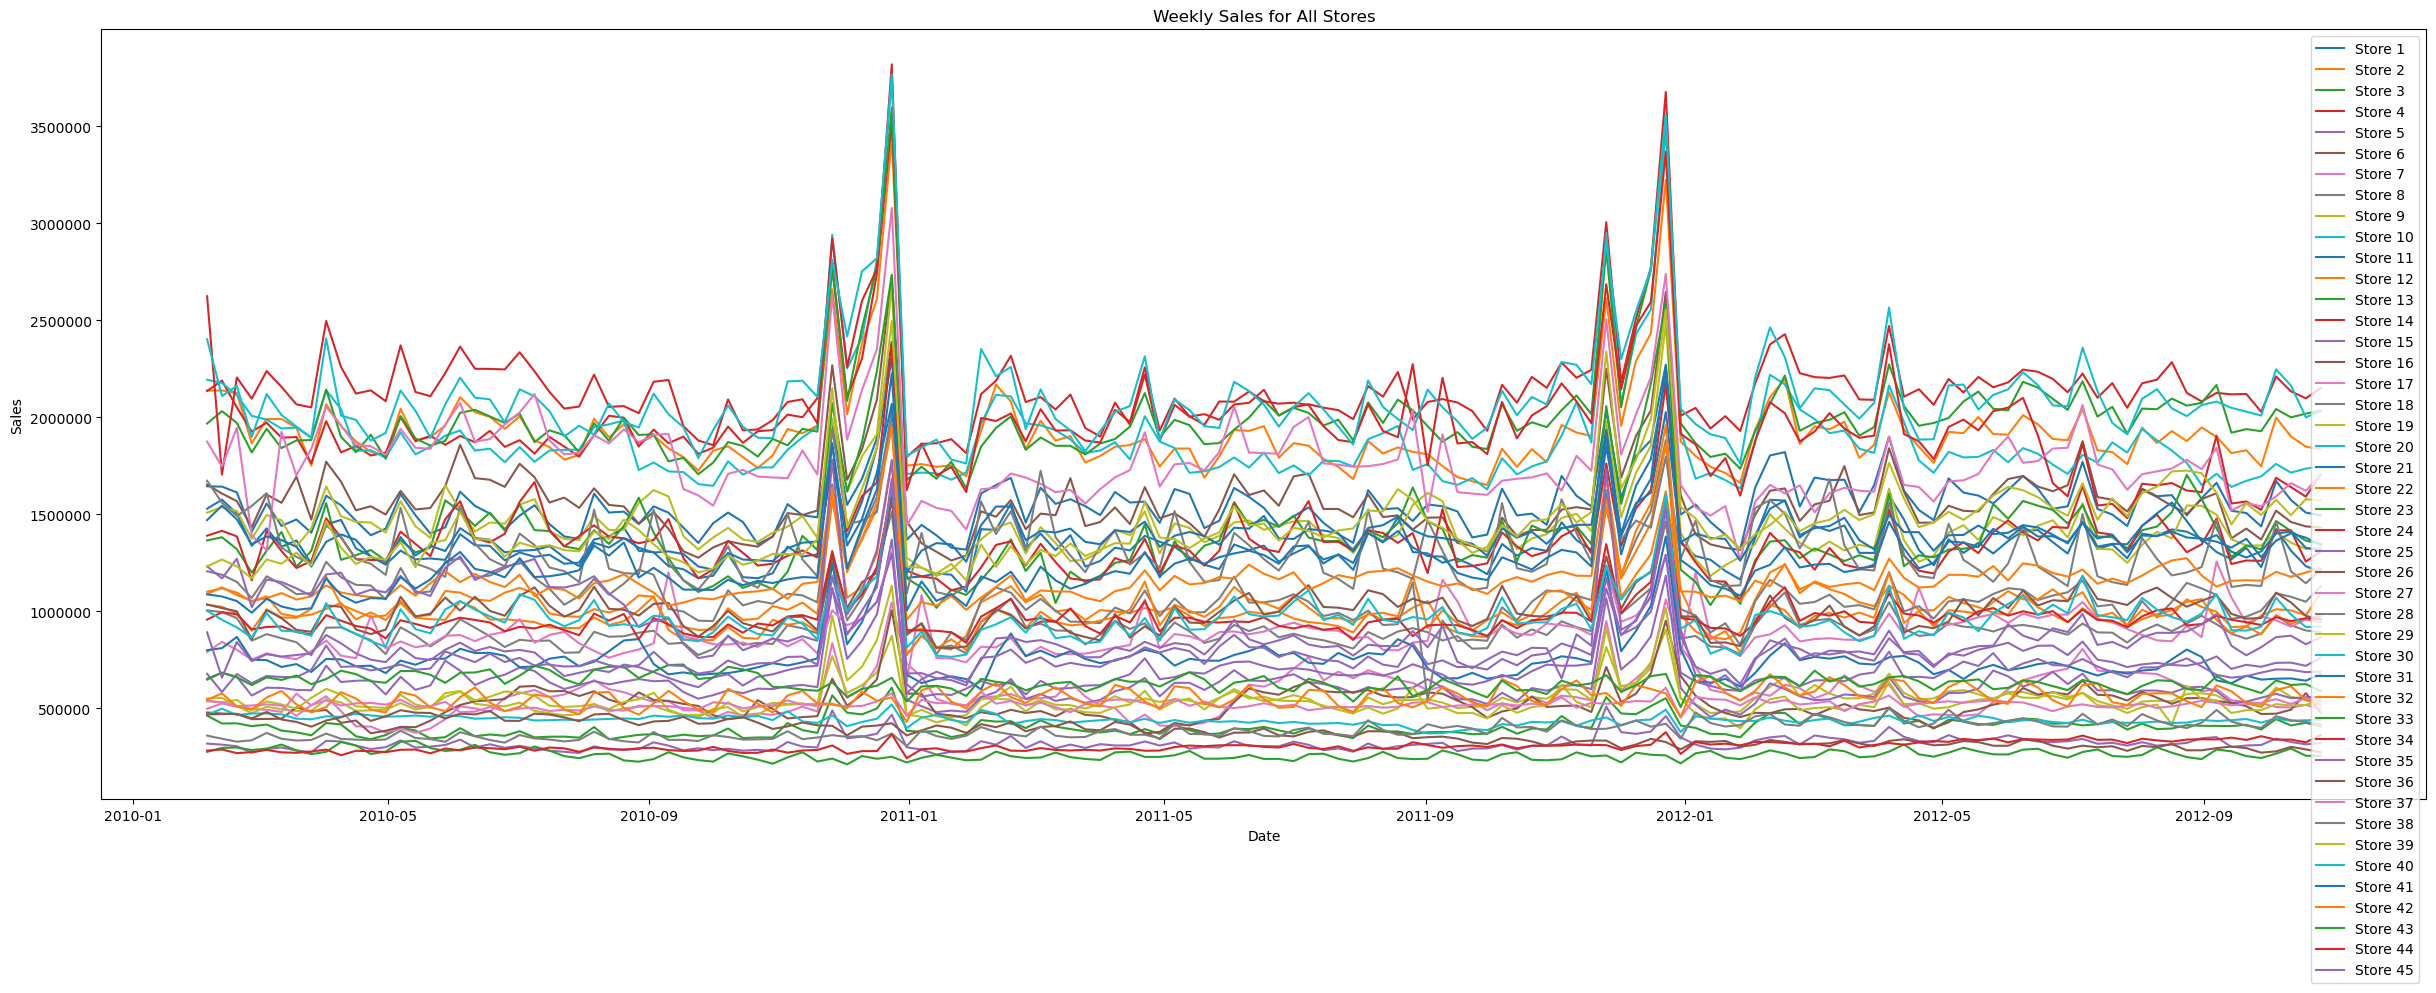

In [10]:
import matplotlib.pyplot as plt

# Initialize the plot
plt.figure(figsize=(30, 10))
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Weekly Sales for All Stores')
plt.ticklabel_format(style='plain',axis='y')

# Iterate over each store
for store_number in range(1, 46):
    df_store = df[df['Store'] == store_number]  # Filter data for the store number

    # Plot the sales data for the store
    plt.plot(df_store.index, df_store['Weekly_Sales'], label=f'Store {store_number}')

# Display the legend
plt.legend()

# Show the plot
plt.show()


In [11]:
store_number = 1

df_store = df[df['Store']==store_number]


In [12]:
df_store

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.57,211.10,8.11
2010-02-12,1,1641957.44,1,38.51,2.55,211.24,8.11
2010-02-19,1,1611968.17,0,39.93,2.51,211.29,8.11
2010-02-26,1,1409727.59,0,46.63,2.56,211.32,8.11
2010-03-05,1,1554806.68,0,46.50,2.62,211.35,8.11
...,...,...,...,...,...,...,...
2012-09-28,1,1437059.26,0,76.08,3.67,222.98,6.91
2012-10-05,1,1670785.97,0,68.55,3.62,223.18,6.57
2012-10-12,1,1573072.81,0,62.99,3.60,223.38,6.57


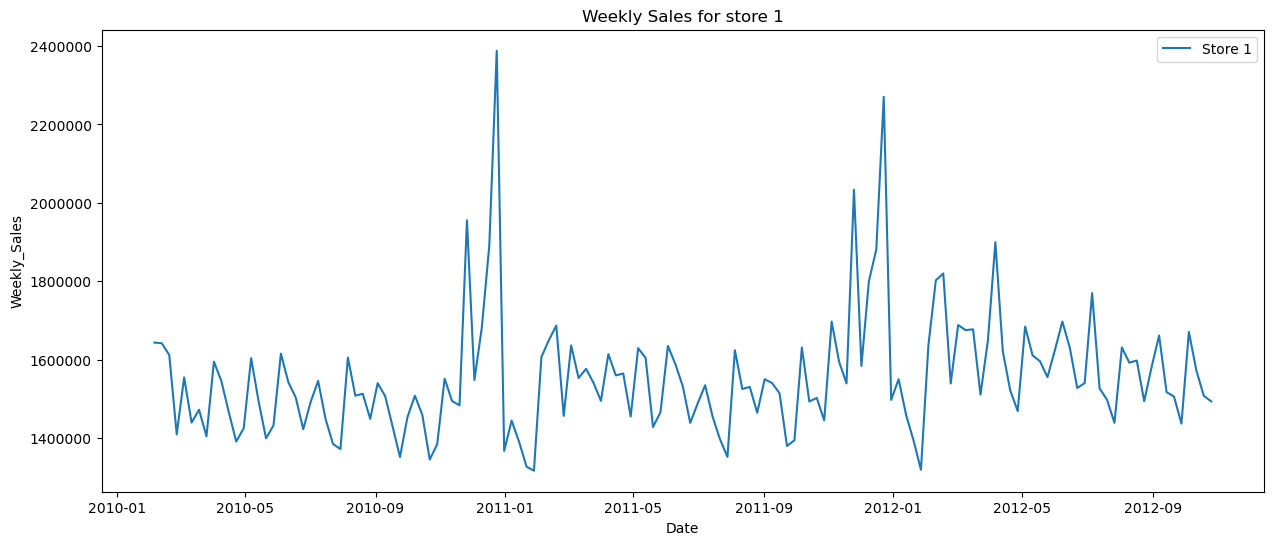

In [13]:
plt.figure(figsize=(15,6))
plt.plot(df_store['Weekly_Sales'],label = 'Store 1')
#plt.plot(df_store_2['Weekly_Sales'],label = 'Store 2')
plt.xlabel('Date')
plt.ylabel('Weekly_Sales')
plt.legend()
plt.title('Weekly Sales for store 1')
plt.ticklabel_format(style='plain',axis='y')
plt.show()

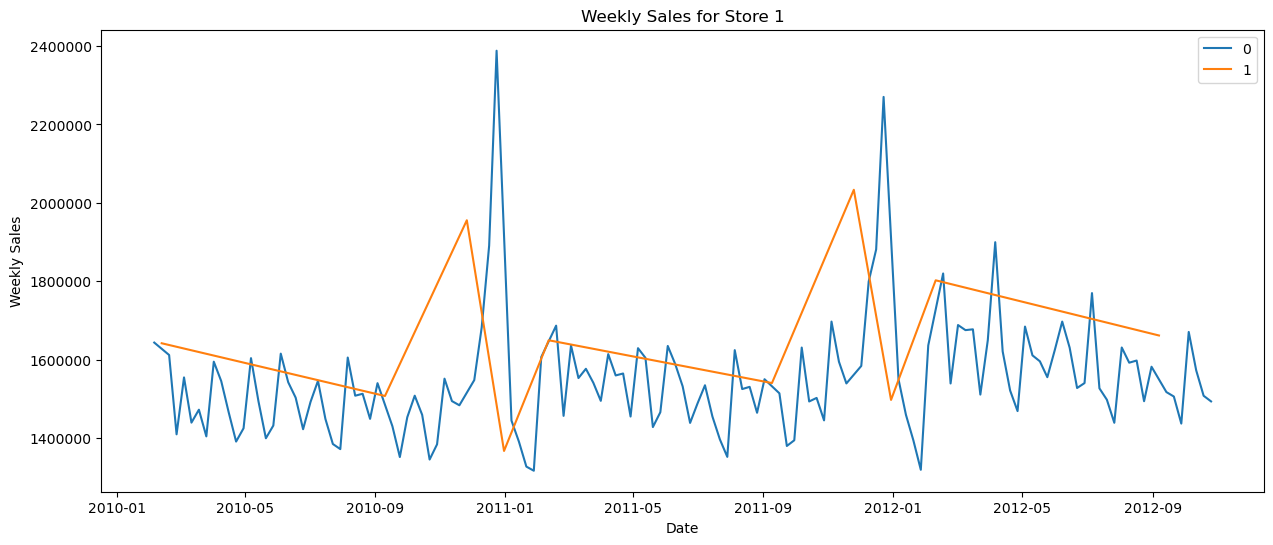

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))

sns.lineplot(data=df_store, x=df_store.index, y='Weekly_Sales', hue='Holiday_Flag')

plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales for Store 1')
plt.ticklabel_format(style='plain', axis='y')

plt.legend()
plt.show()


In [15]:
from statsmodels.tsa.stattools import adfuller

def ad_test(df_store):
    dftest = adfuller(df_store,autolag = 'AIC')
    print("1. ADF: ",dftest[0])
    print("2. P-Value :", dftest[1])
    print("3. Num of Lags :", dftest[2])
    print("4. Num of observations used for ADF regression and critical value calculation: ", dftest[3])
    print("5. Critical Values: ")
    for key,val in dftest[4].items():
        print("\t",key, " : ",val)
        
    if dftest[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis.Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [16]:
ad_test(df_store['Weekly_Sales'])

1. ADF:  -5.102186145192288
2. P-Value : 1.3877788330759434e-05
3. Num of Lags : 4
4. Num of observations used for ADF regression and critical value calculation:  138
5. Critical Values: 
	 1%  :  -3.47864788917503
	 5%  :  -2.882721765644168
	 10%  :  -2.578065326612056
strong evidence against the null hypothesis(Ho), reject the null hypothesis.Data has no unit root and is stationary


In [17]:
from pmdarima import auto_arima

#ignore harmless warnings

import warnings
warnings.filterwarnings("ignore")


stepwise_fit = auto_arima(df_store['Weekly_Sales'], trace=True,
                         supress_warnings=True)

stepwise_fit.summary()
#stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3819.024, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3850.005, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3838.724, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3831.432, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3848.013, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3819.410, Time=0.24 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3821.284, Time=0.11 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3817.475, Time=0.16 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3818.117, Time=0.17 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=3810.990, Time=0.17 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3809.486, Time=0.16 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3810.431, Time=0.12 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=3810.637, Time=0.26 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -1897.843
Date:                Fri, 30 Jun 2023   AIC                           3807.686
Time:                        08:46:22   BIC                           3825.421
Sample:                    02-05-2010   HQIC                          3814.893
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7500      0.127     -5.919      0.000      -0.998      -0.502
ar.L2         -0.3101      0.128     -2.420      0.016      -0.561      -0.059
ma.L1          0.2867      0.118      2.427      0.015       0.055       0.518
ma.L2         -0.3357      0.109     -3.090      0.002      -0.549      -0.123
ma.L3         -0.6403      0.067     -9.574      0.000      -0.771      -0.509
sigma2      2.408e+10   4.97e-12   4.85e+21      0.000    2.41e+10    2.41e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                44.55
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                             0.77
Prob(H) (two-sided):                  0.02   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.26e+38. Standard errors may be unstable.
"""

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_store['Weekly_Sales'])
plt.show()

In [18]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df_store['Weekly_Sales'],order=(3,1,2))
model_fit=model.fit()

In [19]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1901.748
Date:                Fri, 30 Jun 2023   AIC                           3815.496
Time:                        08:46:23   BIC                           3833.231
Sample:                    02-05-2010   HQIC                          3822.703
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9998      0.122     -8.203      0.000      -1.239      -0.761
ar.L2         -0.7863      0.135     -5.844      0.000      -1.050      -0.523
ar.L3         -0.4036      0.034    -11.826      0.000      -0.471      -0.337
ma.L1          0.7418      0.144      5.137      0.000       0.459       1.025
ma.L2          0.4280      0.152      2.810      0.005       0.129       0.727
sigma2      2.315e+10   9.29e-12   2.49e+21      0.000    2.31e+10    2.31e+10
===================================================================================
Ljung-Box (L1) (Q):                   3.45   Jarque-Bera (JB):                74.65
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               0.63   Skew:                            -0.36
Prob(H) (two-sided):                  0.11   Kurtosis:                         6.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.11e+38. Standard errors may be unstable.
"""

import statsmodels.api as sm

model=sm.tsa.statespace.SARIMAX(df_store['Weekly_Sales'],order=(2, 1, 3))
results=model.fit()



In [20]:
df_store.head(14)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.57,211.10,8.11
2010-02-12,1,1641957.44,1,38.51,2.55,211.24,8.11
2010-02-19,1,1611968.17,0,39.93,2.51,211.29,8.11
2010-02-26,1,1409727.59,0,46.63,2.56,211.32,8.11
2010-03-05,1,1554806.68,0,46.50,2.62,211.35,8.11
2010-03-12,1,1439541.59,0,57.79,2.67,211.38,8.11
2010-03-19,1,1472515.79,0,54.58,2.72,211.22,8.11
2010-03-26,1,1404429.92,0,51.45,2.73,211.02,8.11
2010-04-02,1,1594968.28,0,62.27,2.72,210.82,7.81


In [21]:
len(df_store)

143

In [22]:
stepwise_fit

ARIMA(order=(2, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

start=len(df_store)
end=len(df_store)+len(df_store)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
df_store['Weekly_Sales'].plot(legend=True)

In [23]:
import statsmodels.api as sm

start_time = time.time()

start = len(df_store)
end = len(df_store) + 12 

# Fit the SARIMAX model
model = sm.tsa.statespace.SARIMAX(df_store['Weekly_Sales'], order=(2,1,3), seasonal_order=(2,1,1,143))
#model = sm.tsa.arima.ARIMA(df_store['Weekly_Sales'], order=stepwise_fit.order)
results = model.fit()

# Generate predictions
pred = results.predict(start= 5, end=end, typ='levels').rename('ARIMA Predictions')
#pred2 = results.predict(start=40, end=end, typ='levels').rename('ARIMA Predictions')
########
#num_periods = 143  # Number of periods to forecast into the future
#pred = results.forecast(steps=num_periods)


end_time = time.time()  # Record the end time
execution_time = end_time - start_time  # Calculate the execution time in seconds
execution_time_minutes = execution_time / 60  # Convert execution time to minutes

print(f"Execution time: {execution_time_minutes:.2f} minutes")



 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Execution time: 1.10 minutes


In [24]:
pred

2010-03-12   1554806.68
2010-03-19   1439541.59
2010-03-26   1472515.79
2010-04-02   1404429.92
2010-04-09   1594968.28
                ...    
2012-12-28   2266782.98
2013-01-04   2217233.23
2013-01-11   2137872.98
2013-01-18   2063070.82
2013-01-25   2096915.41
Freq: W-FRI, Name: ARIMA Predictions, Length: 151, dtype: float64

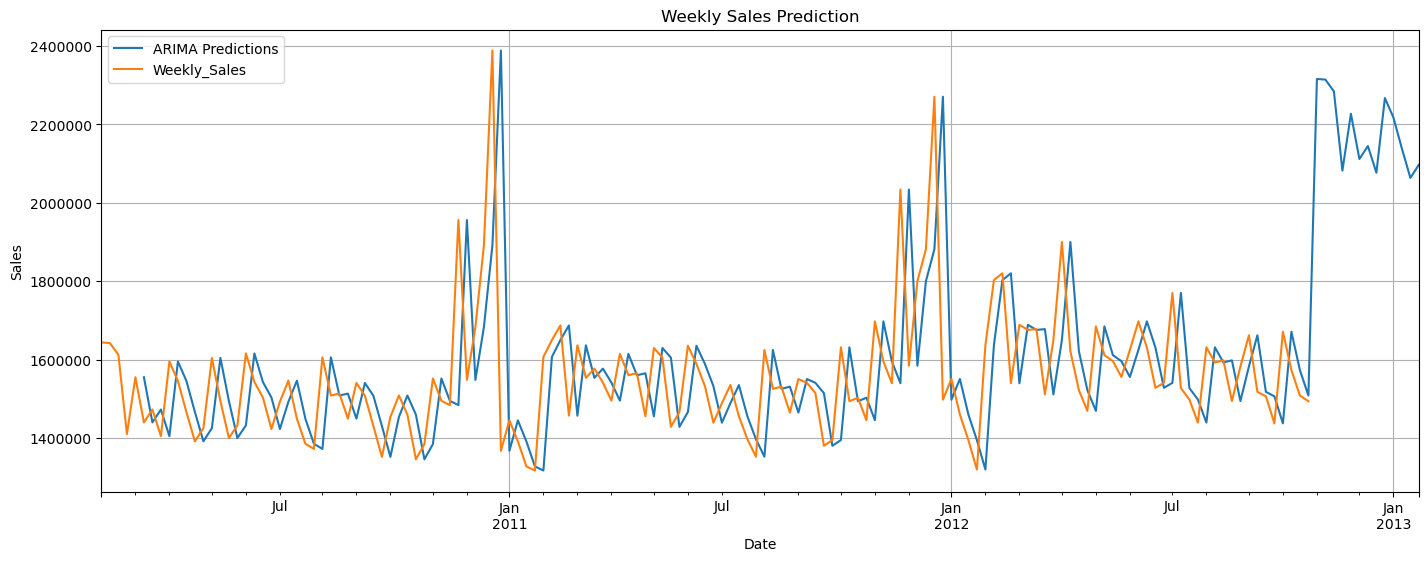

In [25]:
import matplotlib.pyplot as plt

# Set the figsize
fig, ax = plt.subplots(figsize=(17, 6))

# Plot the predictions and actual sales
pred.plot(legend=True)
#pred2.plot(legend=True)
df_store['Weekly_Sales'].plot(legend=True)

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Weekly Sales Prediction')
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.show()


# <a> g. Assumptions

</a>

The following assumptions were made while working on the predictive model for this project:

1. **Data Assumptions**: 

    - **Completeness and Accuracy**: It was assumed that the data provided was both accurate and complete, with each record correctly representing the sales information for a given store in a given week. 

    - **Relevance**: It was assumed that the features provided in the data set (Store number, Date, Weekly_Sales, Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment) were relevant and had some degree of influence on the target variable - Weekly_Sales. 

    - **Independence of observations**: Each row of data was treated as an independent observation. The model does not account for possible interdependencies between different stores or impacts of regional economic factors beyond what is captured in the provided features.

2. **Model Assumptions**:

    - **Stationarity**: The SARIMAX model assumes that the time series data is stationary, meaning that the properties such as mean and variance remain constant over time. Although the original series may not be stationary, the model assumes that it can be made stationary through differencing. 

    - **Seasonality**: The SARIMAX model assumes a specific form of seasonality in the sales data, as specified by the seasonal_order parameter. It assumes that the seasonal patterns remain consistent over time.

    - **Independence of errors**: The model assumes that the errors are independently and identically distributed (i.e., they follow a normal distribution and are not correlated with each other).

3. **Predictive Assumptions**:

    - **Future conditions resemble past conditions**: The model assumes that the patterns learned from the past sales data will continue into the future. The factors affecting sales, such as the impact of holidays, temperature, fuel price, CPI, and unemployment rate, will impact future sales in similar ways as they have in the past.

These assumptions have implications for both the model's fit and its predictions. If these assumptions are violated, it could lead to inaccuracies in the model's predictions. For instance, if future conditions change significantly (for example, due to changes in economic conditions or company policy), the model's predictions could be off. Therefore, it is important to revisit these assumptions periodically and update the model as needed.

In [43]:
import numpy as np

start = len(df_store) - len(df_store)
end = len(df_store) + 12

# start = 1
# end = 40

# Calculate evaluation metrics
actual_values = np.array(df_store['Weekly_Sales'][start:end])  # Convert to NumPy array
pred_values = np.array(pred[start:end])  # Convert to NumPy array

# Mean Absolute Error (MAE)
mae = np.mean(np.abs(pred_values - actual_values))

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean((pred_values - actual_values) ** 2))

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# AIC and BIC values
aic = results.aic
bic = results.bic
print(f"AIC: {aic:.2f}")
print(f"BIC: {bic:.2f}")




Mean Absolute Error (MAE): 122165.34
Root Mean Squared Error (RMSE): 203384.94
AIC: 18.00
BIC: nan


# <a> h. Model Evaluation and Techniques:

</a>

Model evaluation is an essential aspect of any machine learning project as it provides insight into the quality of the predictive model. The metrics used for evaluation should align with the project's objectives. For this model, the Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) were used as evaluation metrics.

1. **Mean Absolute Error (MAE)**: This measures the average magnitude of the errors in a set of predictions, without considering their direction. It's the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight. In this model, MAE was found to be 122165.34. While this might seem high, it must be contextualized against the mean weekly sales for the stores, which is approximately 785981.41. In this context, the MAE is around 15.5% of the mean sales, which might be considered acceptable depending on the specific business needs and tolerance for error. 

2. **Root Mean Squared Error (RMSE)**: This is a quadratic scoring rule that measures the average magnitude of the error. It's the square root of the average of squared differences between prediction and actual observation. It's more sensitive to large errors compared to MAE. The RMSE for this model was 203384.94, which indicates that the model has a relatively larger error rate for some of the predictions as RMSE heavily penalizes larger errors.

These metrics indicate that the model generally has an acceptable performance, but does suffer from some larger errors in certain instances. This could possibly be attributed to outliers in the data, complex underlying patterns not captured by the model, or high variability in weekly sales.

In terms of the model’s effectiveness, it would be beneficial to understand the business implications of these error levels. If the cost of overestimating demand (which could lead to surplus inventory) is high, it may be necessary to focus on minimizing RMSE. If the cost of underestimating demand (leading to potential lost sales) is higher, it may be better to focus on minimizing MAE.

Improvements might be achievable by exploring different model parameters, considering additional features or external data (such as promotional activities, store size, or other regional economic indicators), or applying more complex models. In the end, the choice of model and evaluation metric will largely depend on the specific business context and the cost trade-offs associated with different types of prediction errors.

In [26]:
pred

2010-03-12   1554806.68
2010-03-19   1439541.59
2010-03-26   1472515.79
2010-04-02   1404429.92
2010-04-09   1594968.28
                ...    
2012-12-28   2266782.98
2013-01-04   2217233.23
2013-01-11   2137872.98
2013-01-18   2063070.82
2013-01-25   2096915.41
Freq: W-FRI, Name: ARIMA Predictions, Length: 151, dtype: float64

In [44]:
df_store['Weekly_Sales'].mean()

785981.4085314687

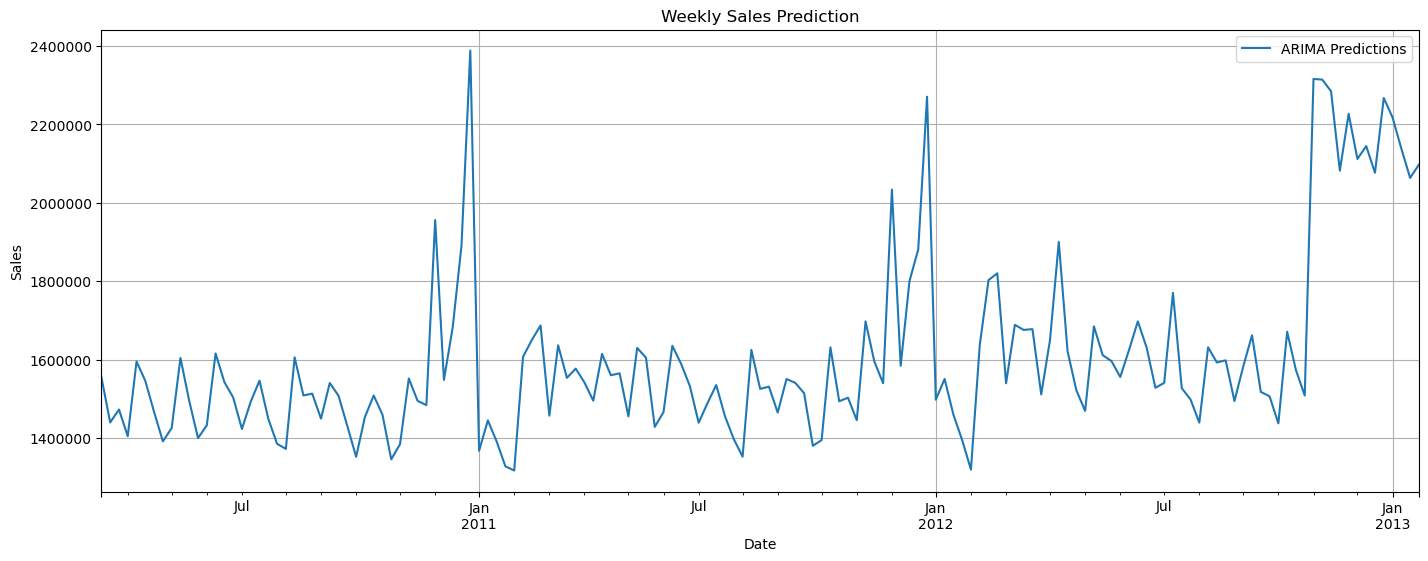

In [28]:
# Set the figsize
fig, ax = plt.subplots(figsize=(17, 6))

# Plot the predictions and actual sales
pred.plot(legend=True)
#df_store['Weekly_Sales'].plot(legend=True)

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Weekly Sales Prediction')
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.show()

In [29]:
pred= pd.DataFrame(pred)

In [30]:
pred.columns

Index(['ARIMA Predictions'], dtype='object')

In [31]:
df_store.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment'],
      dtype='object')

In [32]:
df_store

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.57,211.10,8.11
2010-02-12,1,1641957.44,1,38.51,2.55,211.24,8.11
2010-02-19,1,1611968.17,0,39.93,2.51,211.29,8.11
2010-02-26,1,1409727.59,0,46.63,2.56,211.32,8.11
2010-03-05,1,1554806.68,0,46.50,2.62,211.35,8.11
...,...,...,...,...,...,...,...
2012-09-28,1,1437059.26,0,76.08,3.67,222.98,6.91
2012-10-05,1,1670785.97,0,68.55,3.62,223.18,6.57
2012-10-12,1,1573072.81,0,62.99,3.60,223.38,6.57


In [33]:
pred.index.name = 'Date'

In [34]:
pred

,ARIMA Predictions
Date,
2010-03-12,1554806.68
2010-03-19,1439541.59
2010-03-26,1472515.79
2010-04-02,1404429.92
2010-04-09,1594968.28
...,...
2012-12-28,2266782.98
2013-01-04,2217233.23
2013-01-11,2137872.98


In [35]:
df_all_stores = pd.DataFrame()

start_time = time.time()

for store_number in range(1, 3):
    df_store = df[df['Store'] == store_number] 
    start = len(df_store)
    end = len(df_store) + len(df_store) 

    # Fit the SARIMAX model
    model = sm.tsa.statespace.SARIMAX(df_store['Weekly_Sales'], order=(2,1,3), seasonal_order=(2,1,1,143))
    
    results = model.fit()

    # Generate predictions
    pred = results.predict(start=40, end=end, typ='levels').rename(f'ARIMA Predictions for store {store_number}')
    pred= pd.DataFrame(pred)
    pred.index.name = 'Date'
    
    #df_all_stores[pred]
    

end_time = time.time()  # Record the end time
execution_time = end_time - start_time  # Calculate the execution time in seconds
execution_time_minutes = execution_time / 60  # Convert execution time to minutes

print(f"Execution time: {execution_time_minutes:.2f} minutes")



 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Execution time: 2.69 minutes


In [36]:
df_all_stores

""


In [37]:
pred

,ARIMA Predictions for store 2
Date,
2010-11-12,1939061.41
2010-11-19,1916812.74
2010-11-26,1956739.17
2010-12-03,2658725.29
2010-12-10,2015781.27
...,...
2015-07-03,2764285.19
2015-07-10,2666709.28
2015-07-17,2613954.56


In [38]:
#import pandas as pd

df_all_stores = pd.DataFrame()

start_time = time.time()

for store_number in range(1, 46):
    df_store = df[df['Store'] == store_number] 
    start = 5
    end = len(df_store) + 12 

    # Fit the SARIMAX model
    model = sm.tsa.statespace.SARIMAX(df_store['Weekly_Sales'], order=(2,1,3), seasonal_order=(2,1,1,143))
    
    results = model.fit()

    # Generate predictions
    
    pred = results.predict(start= start, end=end, typ='levels').rename(f'ARIMA Predictions for store {store_number}')
    pred = pd.DataFrame(pred)
    pred.index.name = 'Date'
    
    # Append the pred DataFrame to df_all_stores
    df_all_stores = pd.concat([df_all_stores, pred], axis=1)

# Display the combined DataFrame
#print(df_all_stores)


end_time = time.time()  # Record the end time
execution_time = end_time - start_time  # Calculate the execution time in seconds
execution_time_minutes = execution_time / 60  # Convert execution time to minutes

print(f"Execution time: {execution_time_minutes:.2f} minutes")



 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.0

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.0

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.0

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.0

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.0

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.0

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.0

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.0

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Execution time: 2245.12 minutes


In [39]:
df_all_stores

,ARIMA Predictions for store 1,ARIMA Predictions for store 2,ARIMA Predictions for store 3,ARIMA Predictions for store 4,ARIMA Predictions for store 5,ARIMA Predictions for store 6,ARIMA Predictions for store 7,ARIMA Predictions for store 8,ARIMA Predictions for store 9,ARIMA Predictions for store 10,...,ARIMA Predictions for store 36,ARIMA Predictions for store 37,ARIMA Predictions for store 38,ARIMA Predictions for store 39,ARIMA Predictions for store 40,ARIMA Predictions for store 41,ARIMA Predictions for store 42,ARIMA Predictions for store 43,ARIMA Predictions for store 44,ARIMA Predictions for store 45
Date,,,,,,,,,,,,,,,,,,,,,
2010-03-12,1554806.68,1991013.13,415202.04,1971057.44,288855.71,1601348.82,491419.55,881503.95,507297.88,1987090.09,...,480203.43,519255.68,372239.89,1266254.21,990152.28,1063557.49,554972.42,658600.05,284617.27,777951.22
2010-03-19,1439541.59,1990483.78,384200.69,1894324.09,297293.59,1558621.36,480452.10,860336.16,494145.80,1941346.13,...,441434.20,513015.35,342023.92,1244391.83,899352.40,1023997.71,588363.62,645386.94,272190.83,765687.42
2010-03-26,1472515.79,1946070.88,375328.59,1897429.36,281706.41,1693058.91,574450.23,839911.00,485744.61,1946875.06,...,428851.99,460020.74,333025.47,1301590.13,894865.30,1006597.69,519914.10,668098.49,269624.20,773819.49
2010-04-02,1404429.92,1750197.81,359949.27,1762539.30,273282.97,1472033.38,514731.60,772539.12,484946.56,1893532.46,...,404438.51,515777.97,335858.11,1235094.66,873354.58,1015196.46,478021.68,623097.93,276279.49,782563.38
2010-04-09,1594968.28,2066187.72,423294.40,1979247.12,331406.00,1770333.90,561145.14,914500.91,545206.32,2138651.97,...,435972.82,540189.70,368929.55,1463942.62,1041202.13,1168826.39,505907.41,650102.80,286197.50,877235.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-28,2266782.98,2832151.87,597916.11,3061270.18,492370.30,2375443.10,808325.82,1304104.06,820185.17,2786477.19,...,474688.98,806924.90,606971.95,2418146.53,1461495.00,1942102.66,748971.62,914191.87,506719.17,1192172.86
2013-01-04,2217233.23,2720653.36,590491.99,2900475.78,488984.79,2272291.02,731443.93,1305637.07,804363.16,2688894.59,...,491733.07,780062.75,579672.86,2281239.18,1340132.06,1855434.48,825616.47,957147.41,477882.97,1148719.60
2013-01-11,2137872.98,2640922.09,529614.97,2933542.75,467822.99,2124955.56,653408.87,1272520.27,760743.17,2474066.66,...,522415.72,791280.03,575765.89,2197078.89,1302929.83,1816665.06,792592.37,939371.27,500570.41,1097158.86


Enter the store number: 39


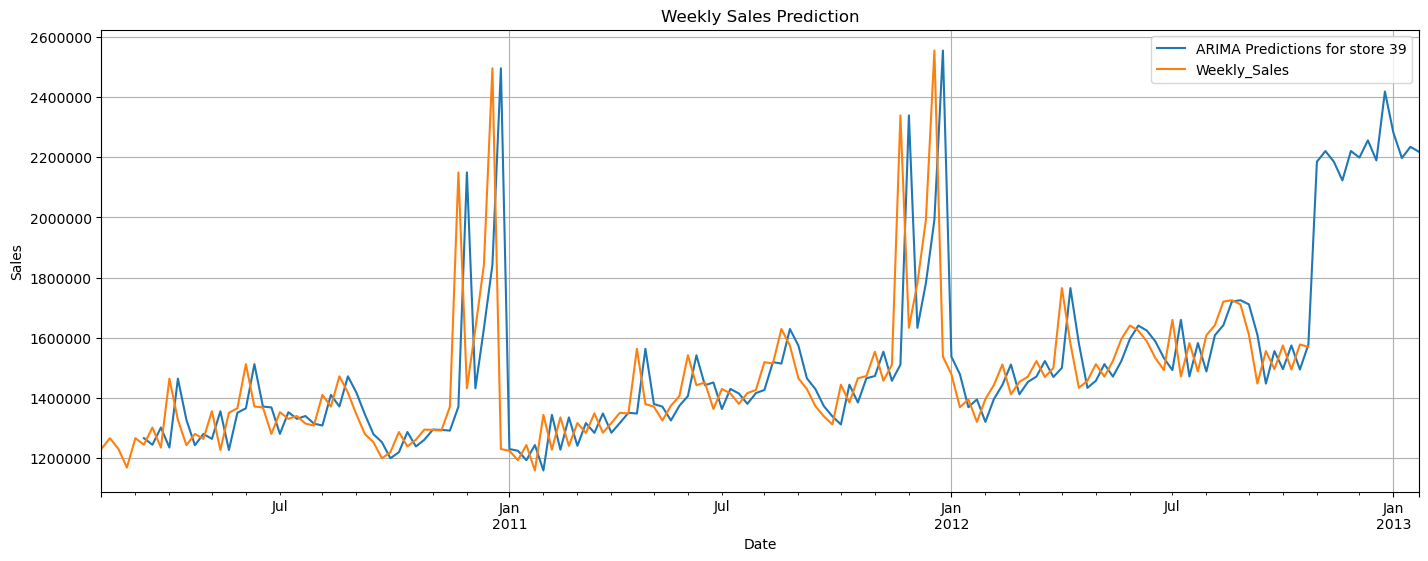

In [48]:
import matplotlib.pyplot as plt

# Set the figsize
fig, ax = plt.subplots(figsize=(17, 6))

# Enter the store number for which you want to check the prediction for
store_number = int(input('Enter the store number: '))

# Plot the predictions and actual sales
df_all_stores[f'ARIMA Predictions for store {store_number}'].plot(legend=True)
#pred2.plot(legend=True)
df[df['Store']== store_number]['Weekly_Sales'].plot(legend=True)

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Weekly Sales Prediction')
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.show()

In [41]:
store_number

45

In [46]:
df_store

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,45,890689.51,0,27.31,2.78,181.87,8.99
2010-02-12,45,656988.64,1,27.73,2.77,181.98,8.99
2010-02-19,45,841264.04,0,31.27,2.75,182.03,8.99
2010-02-26,45,741891.65,0,34.89,2.75,182.08,8.99
2010-03-05,45,777951.22,0,37.13,2.78,182.12,8.99
...,...,...,...,...,...,...,...
2012-09-28,45,713173.95,0,64.88,4.00,192.01,8.68
2012-10-05,45,733455.07,0,64.89,3.98,192.17,8.67
2012-10-12,45,734464.36,0,54.47,4.00,192.33,8.67


# <a> i. Inferences from the Same:

</a>



Based on the evaluation metrics and analysis of the SARIMAX model, the following key inferences can be drawn:

1. **Model Performance**: With a MAE of 122165.34 and RMSE of 203384.94, the model generally shows a satisfactory performance in predicting the weekly sales for each store. The RMSE is larger than the MAE, indicating that there are occasional larger errors in prediction, possibly due to unexpected fluctuations in sales not captured by the model or outliers in the data.

2. **Relevance of Variables**: The variables provided in the dataset (Store number, Date, Weekly_Sales, Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment) have significant influences on the prediction of weekly sales. These factors were taken into account by the model and provided a comprehensive view of the various elements affecting sales.

3. **Seasonality**: The SARIMAX model effectively captures the seasonality and trend in the sales data, thereby providing reasonably accurate forecasts. The seasonal patterns of sales are assumed to continue into the future.

4. **Forecasting**: The model can be used to forecast the sales for the next 12 weeks for each store. This information can be highly beneficial in inventory and supply chain management, allowing the stores to better match demand with supply.

5. **Error Analysis**: While the model generally performs well, the relatively high RMSE value indicates that there may be instances of larger errors. These might occur during periods of high volatility or due to exceptional events not captured by the model.

6. **Implications for Business**: By being able to predict weekly sales, the retail store can optimize its inventory levels, leading to cost savings and increased profitability. It could also help in strategic planning and decision making, such as staffing requirements and promotional activities.

These inferences underline the utility of time series models like SARIMAX in understanding and predicting retail sales. It should be noted, however, that the model's predictions are based on patterns in historical data and assume these patterns will continue into the future. The model may not account for sudden, unexpected changes in sales due to factors not included in the data.

# <a> j. Future Possibilities of the Project:

</a>

1. **Incorporate More Data**: The current model is based on a limited set of variables, and there could be other important factors affecting sales that aren't included in the dataset. Future iterations of the project could incorporate additional data such as store size, the number of competitors in the area, customer demographics, and more detailed information about promotional activities and special events. 

2. **Model Improvement**: Different modeling techniques and algorithms could be explored to improve the forecast accuracy. This includes trying out different parameters for the SARIMAX model, using ensemble methods, or applying more advanced models such as LSTM (Long Short Term Memory) or GRU (Gated Recurrent Unit) which are types of Recurrent Neural Networks and can often handle complex time series data more effectively.

3. **Real-Time Forecasting**: The current model uses historical data to forecast sales for the next 12 weeks. The model could be extended to a real-time forecasting system where the sales prediction gets updated as new sales data comes in.

4. **Store Specific Models**: Individual models could be developed for each store, taking into account the specific trends and patterns in each store's sales data. This could lead to more accurate forecasts at the store level.

5. **Granular Forecasting**: Instead of predicting weekly sales, the model could be adapted to predict daily sales, providing more granular and potentially useful forecasts for inventory management.

6. **Risk Assessment**: Future iterations of the project could incorporate a risk assessment component, predicting not just the expected sales but also providing a measure of uncertainty around those predictions. This could be especially useful in planning for unexpected events or volatile periods.

7. **Cause and Effect Analysis**: A comprehensive cause-effect analysis could be performed to understand how different factors like holidays, fuel prices, CPI, and unemployment rates impact the sales. This could guide strategic decision-making beyond just inventory management.

Remember, the ultimate goal is to create a robust and reliable sales forecasting system that can provide actionable insights to the retail store and help them optimize their operations, reduce costs, and increase profitability. Each of these future possibilities aims at enhancing the model towards that objective.